In [59]:
from scipy.integrate import odeint 
from scipy import array
import matplotlib.pyplot as plt


#Definimos el sistema de ecuaciones de VanDerPol, donde x es la posicion, y es la primera derivada de x
#y dx_y es la derivada de y/segunda derivada de x
def vectorfield(X,t):
    x = X[0]
    y = X[1]
    dx = y
    dx_y = b*(1 - x**2)*dx - x
    return array([dx, dx_y])

In [60]:
stoptime = 500.0
numpoints = 2500

#Creamos los valores del tiempo a utilizar
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#Condiciones iniciales
x0 = 1.0
v0 = 0.0

#Coeficiente de amortiguamiento
b = 1

#Resolvemos el sistema de ecuaciones
x, y = odeint(vectorfield,(x0,v0),t).T

with open('VanDerPol.dat', 'w') as f:
    for t1, x1,y1 in zip(t, x, y):
        print (t1, x1,y1 ,file=f)

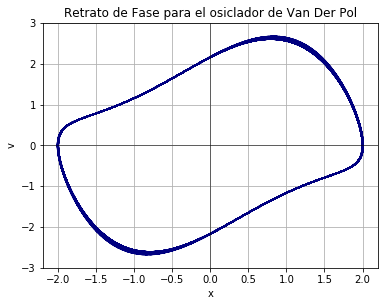

In [63]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
%matplotlib inline
t, x, y = loadtxt('VanDerPol.dat', unpack=True, skiprows=685)

figure(1, figsize=(6, 4.5))

xlabel('x')
ylabel('v')
grid(True)
lw = 1.5

plot(x, y, 'navy', linewidth=lw)

plt.xlim(-2.2,2.2)
plt.ylim(-3,3)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

title('Retrato de Fase para el osiclador de Van Der Pol')
savefig('Im1.png', dpi=100)